In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('database.csv')

In [5]:
df = df.dropna(how='any',axis=0)

In [6]:
df['Pass'] = ['Pass' if x > 59 else 'Failed' for x in df.Grade]

In [7]:
df['Pass'] = df['Pass'].replace('Pass','Passed')

In [8]:
def var_des(data):
    min_val = data.min()
    max_val = data.max()
    med_val = data.median()
    mean_val = data.mean()
    mod_val = data.mode()[0]
    
    print('Minimum:{:.2f}\nMaximum:{:.2f}\nMedian:{:.2f}\nMean:{:.2f}\nMode:{:.2f}\n'.format(min_val,
                          max_val,
                          med_val,
                          mean_val,
                          mod_val))
    
    fig, ax = plt.subplots(1,2, figsize=(17,4))
    
    ax[0].hist(data)
    ax[0].set_ylabel('Frequency')
    ax[0].axvline(min_val,color='black',linestyle='dashed',linewidth=2,alpha=0.60)
    ax[0].axvline(max_val,color='purple',linestyle='solid',linewidth=2,alpha=0.60)
    ax[0].axvline(med_val,color='pink',linestyle='dashed',linewidth=2,alpha=0.60)
    ax[0].axvline(mean_val,color='red',linestyle='solid',linewidth=2,alpha=0.60)
    ax[0].axvline(mod_val,color='yellow',linestyle='dashed',linewidth=2,alpha=0.60)
    
    ax[1].boxplot(data,vert=False)
    ax[1].axvline(min_val,color='black',linestyle='dashed',linewidth=2,alpha=0.60)
    ax[1].axvline(max_val,color='purple',linestyle='solid',linewidth=2,alpha=0.60)
    ax[1].axvline(med_val,color='pink',linestyle='dashed',linewidth=2,alpha=0.60)
    ax[1].axvline(mean_val,color='red',linestyle='solid',linewidth=2,alpha=0.60)
    ax[1].axvline(mod_val,color='yellow',linestyle='dashed',linewidth=2,alpha=0.60)
    
    fig.suptitle('Data Distribution')
    plt.show()

Minimum:3.00
Maximum:97.00
Median:49.50
Mean:49.18
Mode:50.00



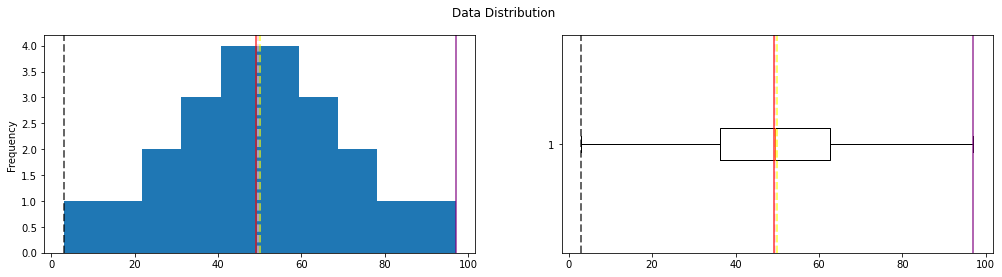

In [9]:
var_des(df.Grade)

In [10]:
df.Grade.count()

22

In [11]:
def show_pie(pie_data):
    val_counts = pie_data.value_counts()
    plt.pie(val_counts,labels=val_counts)
    plt.legend(val_counts.keys())
    plt.title('Pie Distribution')

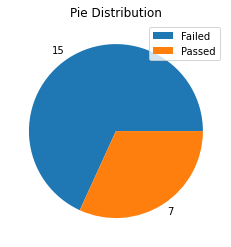

In [12]:
show_pie(df.Pass)

In [13]:
def stats_data(tdata):
    td1 = tdata.min()
    td3 = tdata.median()
    td4 = tdata.mode()[0]
    td2 = tdata.max()
    td5 = tdata.mean()
    
    print('Minimum: {:.2f}\nMaximum: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMean: {:.2f}\n'.format(td1,td2,td3,td4,td5))

In [14]:
stats_data(df.StudyHours)
print()
stats_data(df.Grade)

Minimum: 1.00
Maximum: 16.00
Median: 10.00
Mode: 9.00
Mean: 10.52


Minimum: 3.00
Maximum: 97.00
Median: 49.50
Mode: 50.00
Mean: 49.18



Minimum:1.00
Maximum:16.00
Median:10.00
Mean:10.52
Mode:9.00



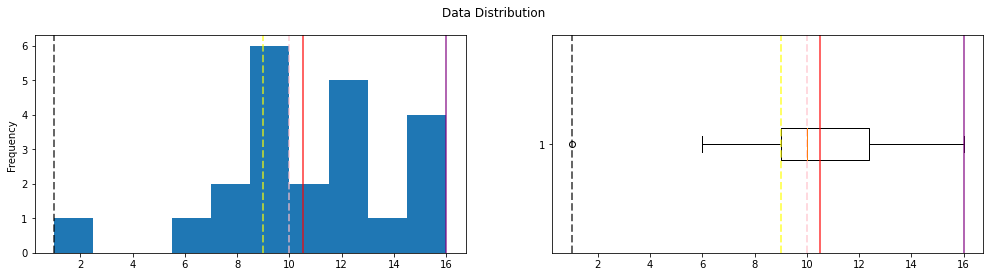

In [15]:
col = df.StudyHours
var_des(col)

Minimum:6.00
Maximum:16.00
Median:10.00
Mean:10.98
Mode:9.00



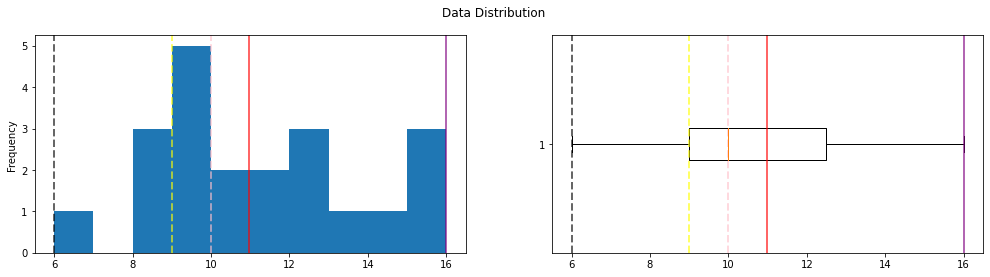

In [16]:
col = df.StudyHours[df.StudyHours>1]
var_des(col)

In [17]:
#Quantile is a cutpoint in the data
q01 = df.StudyHours.quantile(0.01)
col = df.StudyHours[df.StudyHours>q01]

Minimum:6.00
Maximum:16.00
Median:10.00
Mean:10.98
Mode:9.00



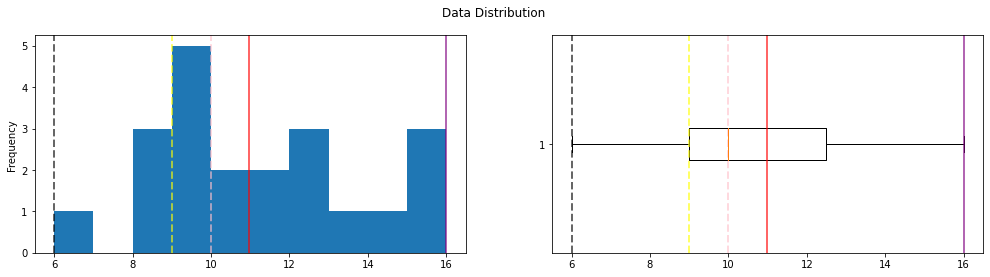

In [18]:
var_des(col)

In [19]:
def var_dens(data1):
    fig = plt.figure(figsize=(17,4))
    vd1 = data1.mean()
    vd2 = data1.median()
    vd3 = data1.mode()[0]
    print('Mean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n'.format(vd1,vd2,vd3))
    data1.plot.density()
    plt.title('Data Density')
    plt.axvline(vd1,color='red',linewidth=2)
    plt.axvline(vd2,color='blue',linewidth=2)
    plt.axvline(vd3,color='green',linewidth=2)
    plt.show()

Mean: 10.98
Median: 10.00
Mode: 9.00



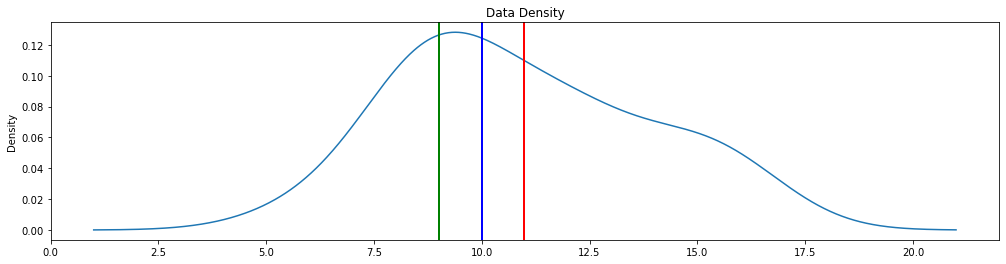

In [20]:
var_dens(col)

In [21]:
for col_name in ['Grade','StudyHours']:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}\n - Range: {:.2f}\n - Variance {:.2f}\n - Std. Dev: {:.2f}\n'.format(col_name,rng,var,std))


Grade
 - Range: 94.00
 - Variance 472.54
 - Std. Dev: 21.74


StudyHours
 - Range: 15.00
 - Variance 12.16
 - Std. Dev: 3.49



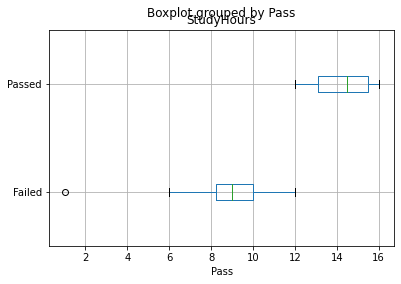

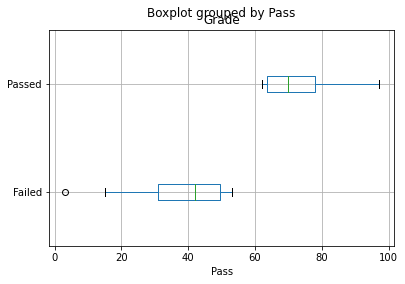

In [22]:
df.boxplot(column='StudyHours',by='Pass',vert=False)
df.boxplot(column='Grade',by='Pass',vert=False)
plt.show()

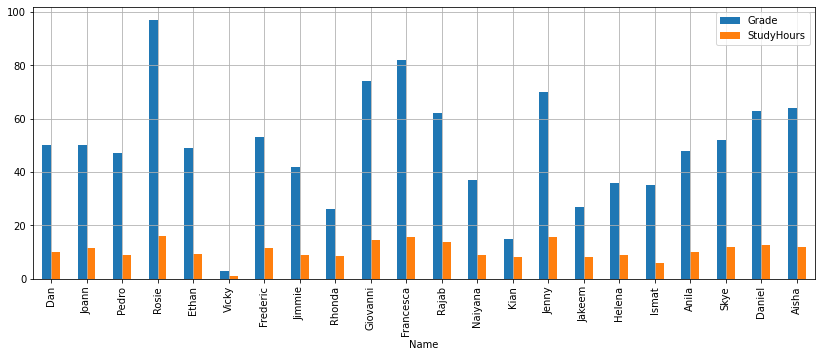

In [23]:
df.plot(x='Name',y=['Grade','StudyHours'],kind='bar',figsize=(14,5))
plt.grid()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
normaliser = MinMaxScaler()

In [26]:
df_normalised = df[['Name','Grade','StudyHours']]

E:\Programs\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


<AxesSubplot:xlabel='Name'>

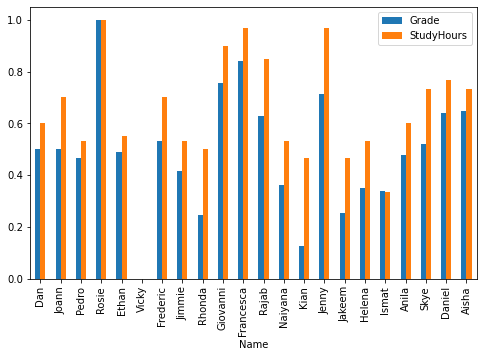

In [27]:
df_normalised[['Grade','StudyHours']] = normaliser.fit_transform(df_normalised[['Grade','StudyHours']])
df_normalised.plot(x='Name',y=['Grade','StudyHours'],kind='bar',figsize=(8,5))

In [28]:
df.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,Failed
1,Joann,11.50,50.0,Failed
2,Pedro,9.00,47.0,Failed
3,Rosie,16.00,97.0,Passed
4,Ethan,9.25,49.0,Failed


In [29]:
from sklearn.model_selection import train_test_split

In [82]:
df

,Name,StudyHours,Grade,Pass,StudyHours2
0,Dan,10.00,50.0,Failed,10.00
1,Joann,11.50,50.0,Failed,11.50
2,Pedro,9.00,47.0,Failed,9.00
3,Rosie,16.00,97.0,Passed,16.00
4,Ethan,9.25,49.0,Failed,9.25
5,Vicky,1.00,3.0,Failed,1.00
6,Frederic,11.50,53.0,Failed,11.50
7,Jimmie,9.00,42.0,Failed,9.00
8,Rhonda,8.50,26.0,Failed,8.50
9,Giovanni,14.50,74.0,Passed,14.50


In [93]:
df = df[df.StudyHours>6]

In [102]:
df.sort_index()

,Name,StudyHours,Grade,Pass,StudyHours2
0,Dan,10.00,50.0,Failed,10.00
1,Joann,11.50,50.0,Failed,11.50
2,Pedro,9.00,47.0,Failed,9.00
3,Rosie,16.00,97.0,Passed,16.00
4,Ethan,9.25,49.0,Failed,9.25
6,Frederic,11.50,53.0,Failed,11.50
7,Jimmie,9.00,42.0,Failed,9.00
8,Rhonda,8.50,26.0,Failed,8.50
9,Giovanni,14.50,74.0,Passed,14.50
10,Francesca,15.50,82.0,Passed,15.50


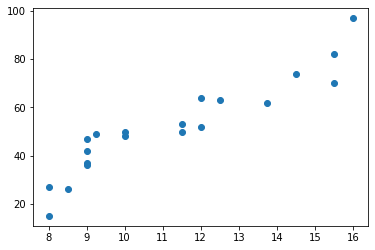

In [103]:
plt.scatter(x=df.StudyHours,y=df.Grade)
plt.show()

In [30]:
df['StudyHours2'] = df['StudyHours']

In [31]:
n_f = ['StudyHours','StudyHours2']

In [104]:
x = df[n_f]

In [105]:
y = df['Grade']

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.50)

In [134]:
from sklearn import linear_model
m1 = linear_model.LinearRegression()

In [135]:
m1.fit(x_train,y_train)

LinearRegression()

In [136]:
predicted = m1.predict(x_test)

In [137]:
from sklearn import metrics

In [138]:
metrics.r2_score(y_test,predicted)

0.853955854423696

In [139]:
del value

In [140]:
input1 = input()
value = [[input1,input1]]

val = m1.predict(value)

def results(val):
    if val > 59:
        x = 'Passed'
    elif val > 39:
        x = 'Promoted'
    else:
        x = 'Failed'
    return x

print(int(val))
results(val)

 14


71


E:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


'Passed'